In [2]:
cd /ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/Correlations_TF_ATAC/

In [3]:
head AJ_0042_ChIPseq_Chronis_ESCs_Oct4_mm10_sorted.bed

chr1	3010019	3010119	id-2	0.398711
chr1	3010119	3010219	id-3	0.664518
chr1	3010219	3010319	id-4	0.531614
chr1	3010319	3010419	id-5	0.000000
chr1	3010419	3010519	id-6	0.664518
chr1	3010519	3010619	id-7	0.398711
chr1	3010619	3010719	id-8	0.132904
chr1	3010719	3010919	id-9	0.000000
chr1	3010919	3011019	id-10	0.265807
chr1	3011019	3011119	id-11	0.664518


In [4]:
alias bigwig2wig="/staging/leuven/stg_00041/software/bigwig2wig/bigWigToWig"
alias wig2bed="/staging/leuven/stg_00041/software/bedops_v2.4.36/wig2bed"
alias sortbed="/staging/leuven/stg_00041/software/bedops_v2.4.36/sort-bed"
alias bedmap="/staging/leuven/stg_00041/software/bedops_v2.4.36/bedmap"

sort the ATAC bed files by position 

In [15]:
sortbed --max-mem 8G cluster1.bed > cluster1_sorted.bed
sortbed --max-mem 8G cluster2.bed > cluster2_sorted.bed
sortbed --max-mem 8G cluster3.bed > cluster3_sorted.bed
sortbed --max-mem 8G cluster4.bed > cluster4_sorted.bed
sortbed --max-mem 8G cluster5.bed > cluster5_sorted.bed
sortbed --max-mem 8G cluster6.bed > cluster6_sorted.bed
sortbed --max-mem 8G cluster7.bed > cluster7_sorted.bed
sortbed --max-mem 8G cluster8.bed > cluster8_sorted.bed
sortbed --max-mem 8G cluster9.bed > cluster9_sorted.bed
sortbed --max-mem 8G cluster10.bed > cluster10_sorted.bed

Score the enrichment with bedmap sum and mean

In [5]:
for f in `ls -1 *cluster_sorted.bed | sed 's/cluster_sorted.bed//'`; do bedmap --sum ${f}cluster_sorted.bed AJ_0042_ChIPseq_Chronis_ESCs_Oct4_mm10_sorted.bed > ${f}cluster_Oct4_sum.bed; done

### Kernel: R

In [1]:
library(ggplot2)
library(dplyr)
library(readr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
setwd("/ddn1/vol1/staging/leuven/stg_00041/Irene/Figure_2/Correlations_TF_ATAC/")

In [3]:
# Importing the raw results and storing in variable
cluster1_Oct4_sum <- read_csv("1cluster_Oct4_sum.bed", col_names = FALSE)
cluster2_Oct4_sum <- read_csv("2cluster_Oct4_sum.bed", col_names = FALSE)
cluster3_Oct4_sum <- read_csv("3cluster_Oct4_sum.bed", col_names = FALSE)
cluster4_Oct4_sum <- read_csv("4cluster_Oct4_sum.bed", col_names = FALSE)
cluster5_Oct4_sum <- read_csv("5cluster_Oct4_sum.bed", col_names = FALSE)
cluster6_Oct4_sum <- read_csv("6cluster_Oct4_sum.bed", col_names = FALSE)
cluster7_Oct4_sum <- read_csv("7cluster_Oct4_sum.bed", col_names = FALSE)
cluster8_Oct4_sum <- read_csv("8cluster_Oct4_sum.bed", col_names = FALSE)
cluster9_Oct4_sum <- read_csv("9cluster_Oct4_sum.bed", col_names = FALSE)
cluster10_Oct4_sum <- read_csv("10cluster_Oct4_sum.bed", col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)
Parsed with column specification:
cols(
  X1 = col_double()
)


In [4]:
head(cluster1_Oct4_sum)

X1
0.531615
2.525169
5.980666
2.790976
3.322592
2.126459


In [5]:
cluster1_Oct4_sum <- as.data.frame(cluster1_Oct4_sum)
cluster2_Oct4_sum <- as.data.frame(cluster2_Oct4_sum)
cluster3_Oct4_sum <- as.data.frame(cluster3_Oct4_sum)
cluster4_Oct4_sum <- as.data.frame(cluster4_Oct4_sum)
cluster5_Oct4_sum <- as.data.frame(cluster5_Oct4_sum)
cluster6_Oct4_sum <- as.data.frame(cluster6_Oct4_sum)
cluster7_Oct4_sum <- as.data.frame(cluster7_Oct4_sum)
cluster8_Oct4_sum <- as.data.frame(cluster8_Oct4_sum)
cluster9_Oct4_sum <- as.data.frame(cluster9_Oct4_sum)
cluster10_Oct4_sum <- as.data.frame(cluster10_Oct4_sum)


In [6]:
cluster1_Oct4_sum$cluster <- "C1"
cluster2_Oct4_sum$cluster <- "C2"
cluster3_Oct4_sum$cluster <- "C3"
cluster4_Oct4_sum$cluster <- "C4"
cluster5_Oct4_sum$cluster <- "C5"
cluster6_Oct4_sum$cluster <- "C6"
cluster7_Oct4_sum$cluster <- "C7"
cluster8_Oct4_sum$cluster <- "C8"
cluster9_Oct4_sum$cluster <- "C9"
cluster10_Oct4_sum$cluster <- "C10"

In [7]:
ATACclusters_Oct4_sum_merged <- rbind(cluster1_Oct4_sum,
                                        cluster2_Oct4_sum,
                                        cluster3_Oct4_sum,
                                        cluster4_Oct4_sum,
                                        cluster5_Oct4_sum,
                                        cluster6_Oct4_sum,
                                        cluster7_Oct4_sum,
                                        cluster8_Oct4_sum,
                                        cluster9_Oct4_sum,
                                        cluster10_Oct4_sum)

In [8]:
head(ATACclusters_Oct4_sum_merged)

X1,cluster
0.531615,C1
2.525169,C1
5.980666,C1
2.790976,C1
3.322592,C1
2.126459,C1


In [9]:
ATACclusters_Oct4_sum_merged$cluster <- factor(ATACclusters_Oct4_sum_merged$cluster, levels = c("C6", "C1", "C7","C8","C5","C3","C9","C2","C10","C4"))

In [10]:
Oct4 <- ggplot(ATACclusters_Oct4_sum_merged, aes(x=as.factor(cluster),y=X1, color = cluster))+
  geom_violin(aes(fill = cluster)) +
scale_y_log10()+
scale_fill_brewer(palette="Paired")+
scale_color_brewer(palette = "Paired")+
#coord_cartesian(ylim=c(0,))+
geom_point(position = position_jitter(width = .3), alpha = .3, size = 1, color = "black", shape = 1)+
#scale_y_log10()+
geom_boxplot(width=.2, color = "black", fill = "white")+
#scale_y_log10()+
theme(axis.text.x  = element_text(angle=0, vjust=0.5, size=14, color = "black"))+
xlab("") +
ylab("sum score")+
theme(plot.title = element_text(size=14,hjust=0.5))+
ggtitle("Oct4")+
theme(axis.text.y  = element_text(color = "black",size=14))+
    theme(legend.title=element_blank())+
    theme(axis.line = element_blank(),
    panel.grid.major = element_line(colour = "grey82"),
   
    panel.border = element_rect(colour = "black", fill =NA, size = 1),
    panel.background = element_blank())

In [11]:
options(repr.plot.width=5, repr.plot.height=5)

Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 76 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 76 rows containing non-finite values (stat_boxplot)."

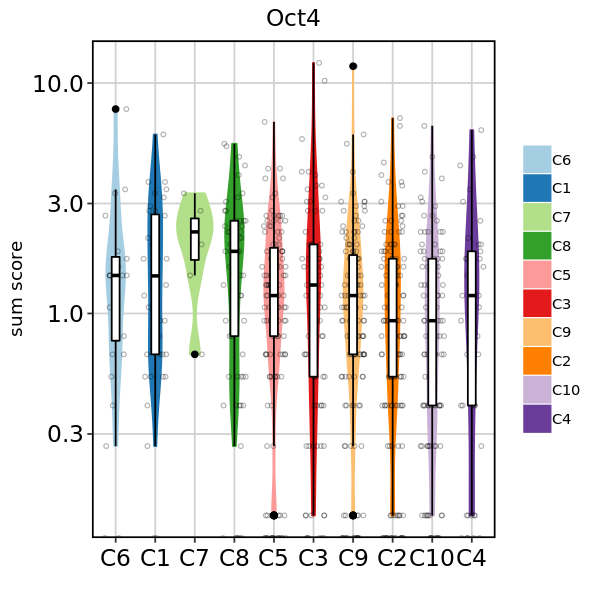

In [12]:
Oct4

In [13]:
ggsave("ATACclusters_Oct4_sum_log10.pdf")

Saving 6.67 x 6.67 in image
Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Transformation introduced infinite values in continuous y-axis"Warning message:
"Removed 76 rows containing non-finite values (stat_ydensity)."Warning message:
"Removed 76 rows containing non-finite values (stat_boxplot)."

In [13]:
pairwise.wilcox.test(ATACclusters_Oct4_sum_merged$X1, ATACclusters_Oct4_sum_merged$cluster, p.adjust.method = "none")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
"cannot compute exact p-value with ties"


	Pairwise comparisons using Wilcoxon rank sum test 

data:  ATACclusters_Oct4_sum_merged$X1 and ATACclusters_Oct4_sum_merged$cluster 

    C6     C1     C7     C8     C5     C3     C9     C2     C10   
C1  0.5751 -      -      -      -      -      -      -      -     
C7  0.0740 0.2462 -      -      -      -      -      -      -     
C8  0.4441 0.9117 0.1788 -      -      -      -      -      -     
C5  0.5463 0.1242 0.0200 0.0668 -      -      -      -      -     
C3  0.8091 0.2321 0.0491 0.1615 0.6951 -      -      -      -     
C9  0.4584 0.0862 0.0124 0.0329 0.7615 0.5840 -      -      -     
C2  0.2318 0.0168 0.0091 0.0057 0.1888 0.1706 0.2456 -      -     
C10 0.1388 0.0078 0.0060 0.0023 0.0896 0.0923 0.1045 0.6373 -     
C4  0.4747 0.1052 0.0286 0.0615 0.6359 0.4483 0.6938 0.7903 0.6108

P value adjustment method: none 